# Part I - Ford GoBike System Data Exploratory analysis
## by Naama Benita

## Introduction

**Ford GoBike System Data Dataset**:
The Ford GoBike System Data is an open dataset that contain detailed information about the individual rides taken using the Ford GoBike bike-sharing service in the San Francisco Bay Area. The dataset provides valuable insights into user behavior, such as trip details, timestamps, bike types and user demographic information. 

## Preliminary Wrangling

In [67]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [68]:
#Load the dataset
df = pd.read_csv("./201902-fordgobike-tripdata.csv")

In [69]:
#high- level overview of data shape and composition
#check the top 10 rows
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,32:10.1,01:56.0,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,53:21.8,42:03.1,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,13:13.2,24:08.1,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,54:26.0,02:36.8,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,54:18.5,20:44.1,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,49:58.6,19:51.8,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,55:35.1,14:42.6,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,41:06.8,08:02.8,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,41:48.8,07:59.7,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,49:47.7,07:17.0,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [60]:
df.shape

(183412, 16)

In [30]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### What is the structure of your dataset?

The dataset contains 183,412 trips with 16 features.
Most variables are either numeric or categorical. Some variables represent timestamps and geographical coordinates, while others describe demographics and ride details.

**Numeric columns:** duration_sec, start_station_id, start_station_latitude,start_station_longitude, end_station_id, end_station_latitude, end_station_longitude, bike_id, member_birth_year.
**Categorical columns:** user_type, member_gender, bike_share_for_all_trip, start_station_name, end_station_name.
**Timestamp columns:** start_time, end_time.


### What is/are the main feature(s) of interest in your dataset?

The main features of interest in this dataset are **trip duration**-duration_sec and **user type**-user_type, as they provide insights into the duration of user engagement with the system and how behavior varies between Subscribers and Customers.
Additional features like **Age, Gender and geographic information** can also be analyzed to investigate how factors as **location and demographics** influnce trip duration and usage trends.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

**Supporting features**:
*member_gender and member_birth_year - to examine demographic-based differences in trip duartion or frequency.
*latitude and longitude - to analyze potential location-based trends. 
*bike_share_for_all_trip - to explore the impact of the bike-sharing program on trip details.

## Univariate Exploration

Let's start to understand  the distribution of trip duration first - are most trips long or short? 
Feature:duration_sec

In [47]:
#lets check the min and max values of 'duration_sec' column
df['duration_sec'].describe()

count    183412.000000
mean        726.078435
std        1794.389780
min          61.000000
25%         325.000000
50%         514.000000
75%         796.000000
max       85444.000000
Name: duration_sec, dtype: float64

we can see from above that the data has a very wide range.

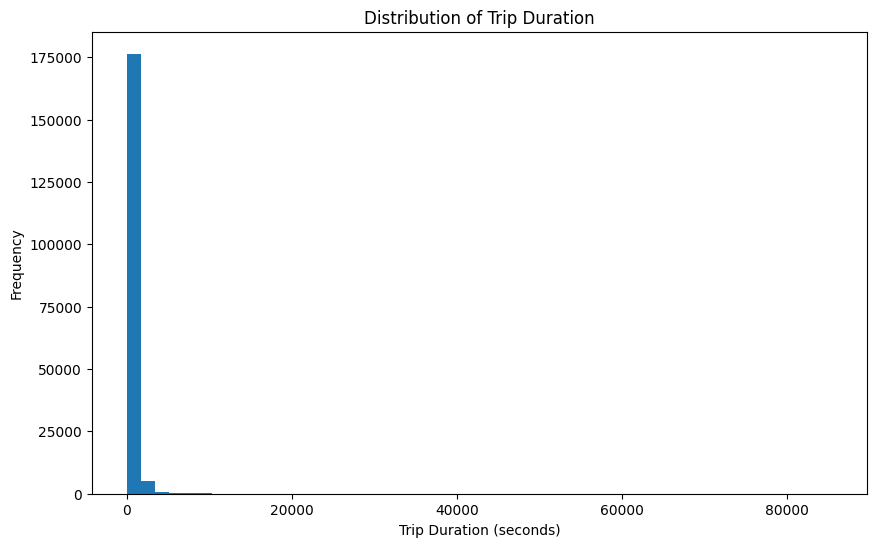

In [61]:
#plot histogram for the Trip Duartion distribution
plt.figure(figsize=[10,6])
plt.hist(df['duration_sec'], bins = 50)
plt.title('Distribution of Trip Duration')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

From above we can see that the histogram is highly skewed due to the presence of few large values in 'duration_sec' column.
Lets try to solve it by filtering out the outliers.

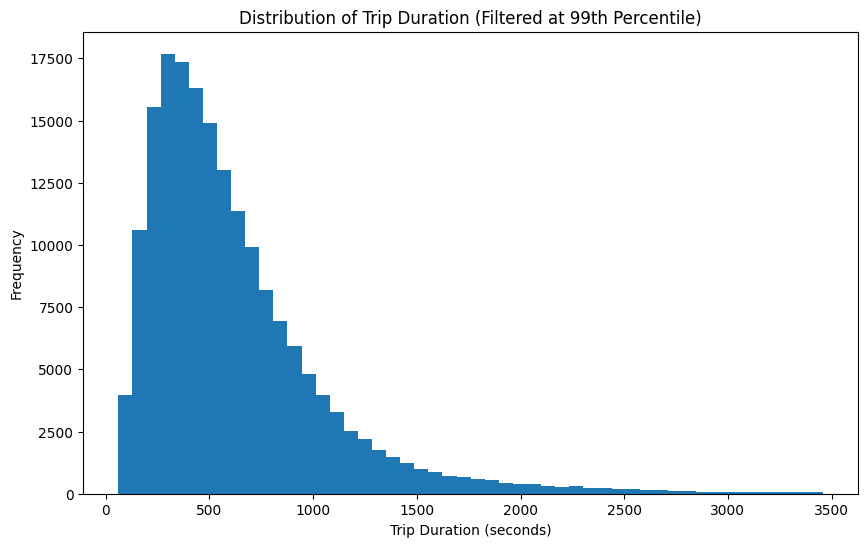

In [70]:
#Function to Filtered out values above the given  percentile

def filter_outliers(data, column,percentile =0.99):
    percentile_value = data[column].quantile(percentile)
    return data[data[column] <= percentile_value]
   

#Filter out outliers    
filtered_data = filter_outliers(df, 'duration_sec')

#plot histogram
plt.figure(figsize=[10,6])
plt.hist(filtered_data['duration_sec'], bins = 50)
plt.title('Distribution of Trip Duration (Filtered at 99th Percentile)')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')

#show the plot
plt.show()

Now, after filtering out trips beyond the 99th percentile, we don't see extremely long trips in this plot.
The histogram shows that most trip duration are on the shorter side, with a long tail extending to the right for long trips.
The highest frequency of trips appears to be around the 200-600 second range, approximately 3 to 10 minutes.
As trip duration increases, the frequency gradually decreases- fewer users take longer trips.

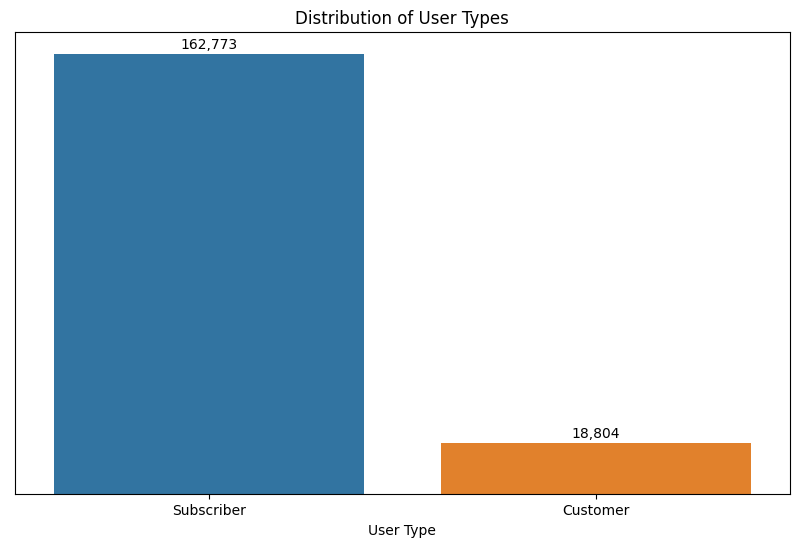

In [77]:
#Now lets explore  the number of Subscribers Vs Customers using a count plot
#Feature:user_type

plt.figure(figsize=[10,6])
ax = sns.countplot(x='user_type', data=filtered_data)
plt.title('Distribution of User Types')
plt.xlabel('User Type')

#remove the y-axis label and ticks
ax.get_yaxis().set_visible(False) #hide the y-axis 

#Add count labels on top of each bar

for p in plt.gca().patches:
    count = int(p.get_height()) #get the count value of each bar
    plt.text(p.get_x() + p.get_width() / 2, count + 1000, #position of the text at the center and above each bar
             f'{count:,}', ha='center', va ='bottom') #to format the number with commas as thousands separators
    
#Add ticks with labels 'Customer' and 'Subscriber'
ax.set_xticks([0, 1])
ax.set_xticklabels(['Subscriber', 'Customer'])#Labels for the ticks

plt.show()

we can see from above that majority of users are 'Subscribers', compared to a much smaller count of 'Customers'.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The variable of interest - 'duration_sec', represent the duration of each trip in seconds.
The distribution of duartion_sec is highly right-skewed.
There were some unusually long duartion in the dataset, those outliers distorted the histogram, making it difficult to analyze the bulk of the data. Hence I filtered out the outliers by limiting the data do the 99th percentile of duration_sec, making the distribution more readable without the influence of extreme values.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

yes, the distribution of  duration_sec variable was heavily skewed to the right. As we can see from above I prefered to show also the "draft" plot histogram in order to reflect this issue.Those outliers were significantly higher than the majority of the data and affected the readability of the histogram plot.
To improve the visualization, I filtered out the top 1% of longest trips. 
This opertion helped me to focus on the main range of values, allowing a clearer view.

## Bivariate Exploration

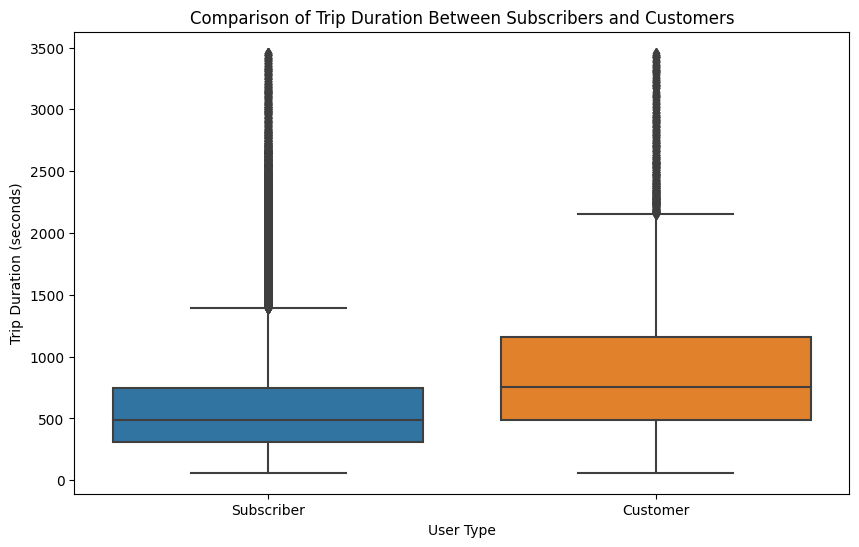

In [72]:
#lets compare the distribution of trip durations between Subscribers and Customers using a Box plot
#Features: user_type, duration_sec

plt.figure(figsize=[10,6])
sns.boxplot(x='user_type', y='duration_sec', data=filtered_data)
plt.title('Comparison of Trip Duration Between Subscribers and Customers')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (seconds)')

#customize x-tick labels
plt.xticks([0, 1], ['Subscriber', 'Customer'])

plt.show()

From above box plot we can see that Customers tend to take longer trips on average, with a wider range of trip durations, 
while Subscribers generally have shorter, more consistent trip durations.
Subscribers generally have a more compact range of trip duration, with fewer extremely long trips compared to Customers, who show a wider range and more frequent instances of longer trips.

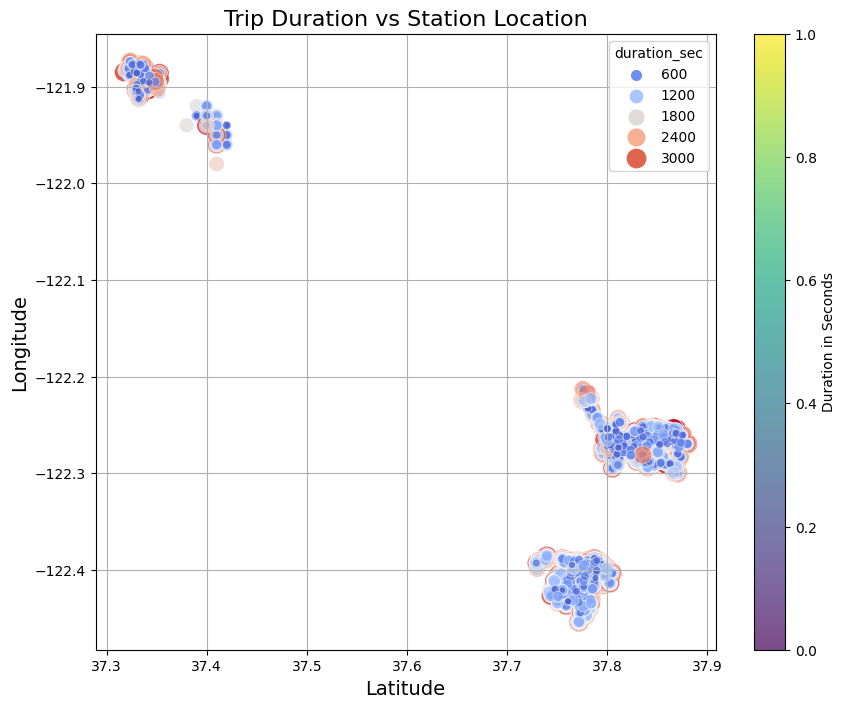

In [73]:
#Now I want to check Trip duration vs Latitude and Longitude using a scatter plot to visualize the reletionship between geographic location and trip 
#duration, identifying if certain areas have longer trips

plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x='start_station_latitude', y='start_station_longitude', hue='duration_sec', data=filtered_data, palette='coolwarm',
                     size='duration_sec', sizes=(20,200), alpha=0.7)
#Add color bar and gridlines
plt.colorbar(scatter.collections[0], label='Duration in Seconds')
plt.grid(True)

#set title and labels with large font size
plt.title('Trip Duration vs Station Location', fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Longitude', fontsize=14)
plt.show()

From above we can see that the data points are clustered in specific geographocal areas, indicating that trips are concentrated in certain regions, this suggest that users often use the bike-sharing system within familiar or frequented locations. The color-coded points reveal that trip duration vary across different locations. Some areas have a higher concentration of longer trips compared to others.

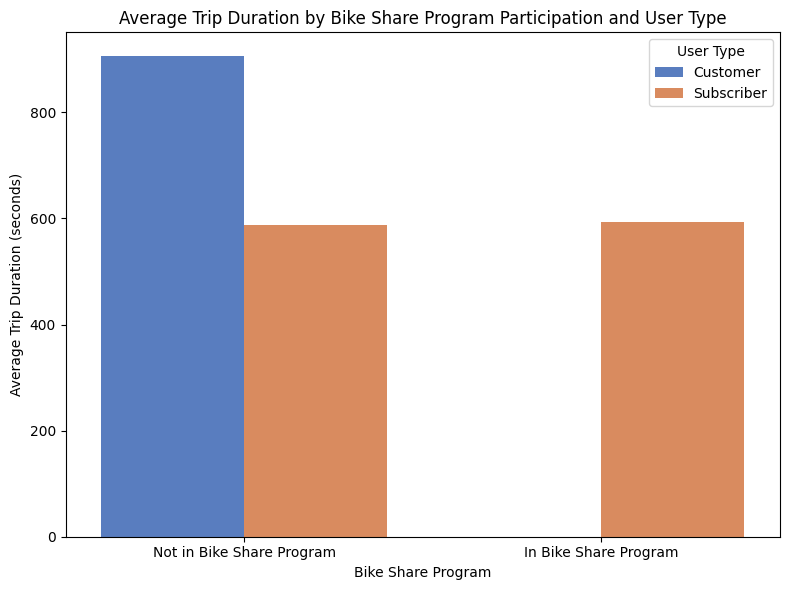

In [79]:
#Bike Share Program vs. Trip Duration: I want to explore the impact of bike share programs and user type on trip duration using a clustered bar chart
plt.figure(figsize=(8,6))
sns.barplot(x='bike_share_for_all_trip', y=filtered_data['duration_sec'], hue='user_type', data=df, estimator=np.mean, errorbar=None, palette="muted")
plt.title('Average Trip Duration by Bike Share Program Participation and User Type')
plt.xlabel('Bike Share Program')
plt.ylabel('Average Trip Duration (seconds)')


#customize x-tick labels
plt.xticks([0, 1], ['Not in Bike Share Program', 'In Bike Share Program'])

#Add Legend for user types
plt.legend(title='User Type', loc='upper right', fontsize=10)


#improve spacing
plt.tight_layout()
#show the plot
plt.show()

Above plot shows that the Customers tend to have significantly longer trip durations compared to Subscribers when they are not participationg in the bike share program.
For subscribers- thier average trip duration remains fairly similat regardless of participation.
For Customers - there is no data shown for "In Bike Share Program", implying that they may not participate in the bike share program at all.  

## Optional Plot- Not Mandatory 

In [80]:
#This plot is not mandatory as per the project requirment, still I preferd to keep it for my investigation. 
#Let's understand if there is a relationship between trip duration and user age(member_birth_year) by using a strip plot
#Features: duration_sec, member_birth_year
#I already checked above and I saw that there are some non-null entries for member_birth_year(df.info()), I will drop those rows first as there is no significant impact on the results for this small portion of the data.

df.dropna(subset=['member_birth_year'], inplace=True)
df.info()          

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             175147 non-null  int64  
 1   start_time               175147 non-null  object 
 2   end_time                 175147 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   175147 non-null  float64
 6   start_station_longitude  175147 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     175147 non-null  float64
 10  end_station_longitude    175147 non-null  float64
 11  bike_id                  175147 non-null  int64  
 12  user_type                175147 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [81]:
#now I will create a new column 'Age' from 'member_birth_year'

df['Age'] = (2024 - df['member_birth_year']).astype(int)
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Age
0,52185,32:10.1,01:56.0,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,40
2,61854,13:13.2,24:08.1,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,52
3,36490,54:26.0,02:36.8,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,35
4,1585,54:18.5,20:44.1,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,50
5,1793,49:58.6,19:51.8,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,65
6,1147,55:35.1,14:42.6,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No,41
7,1615,41:06.8,08:02.8,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No,35
8,1570,41:48.8,07:59.7,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No,36
9,1049,49:47.7,07:17.0,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No,32
10,458,57:57.2,05:35.4,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5318,Subscriber,1996.0,Female,Yes,28


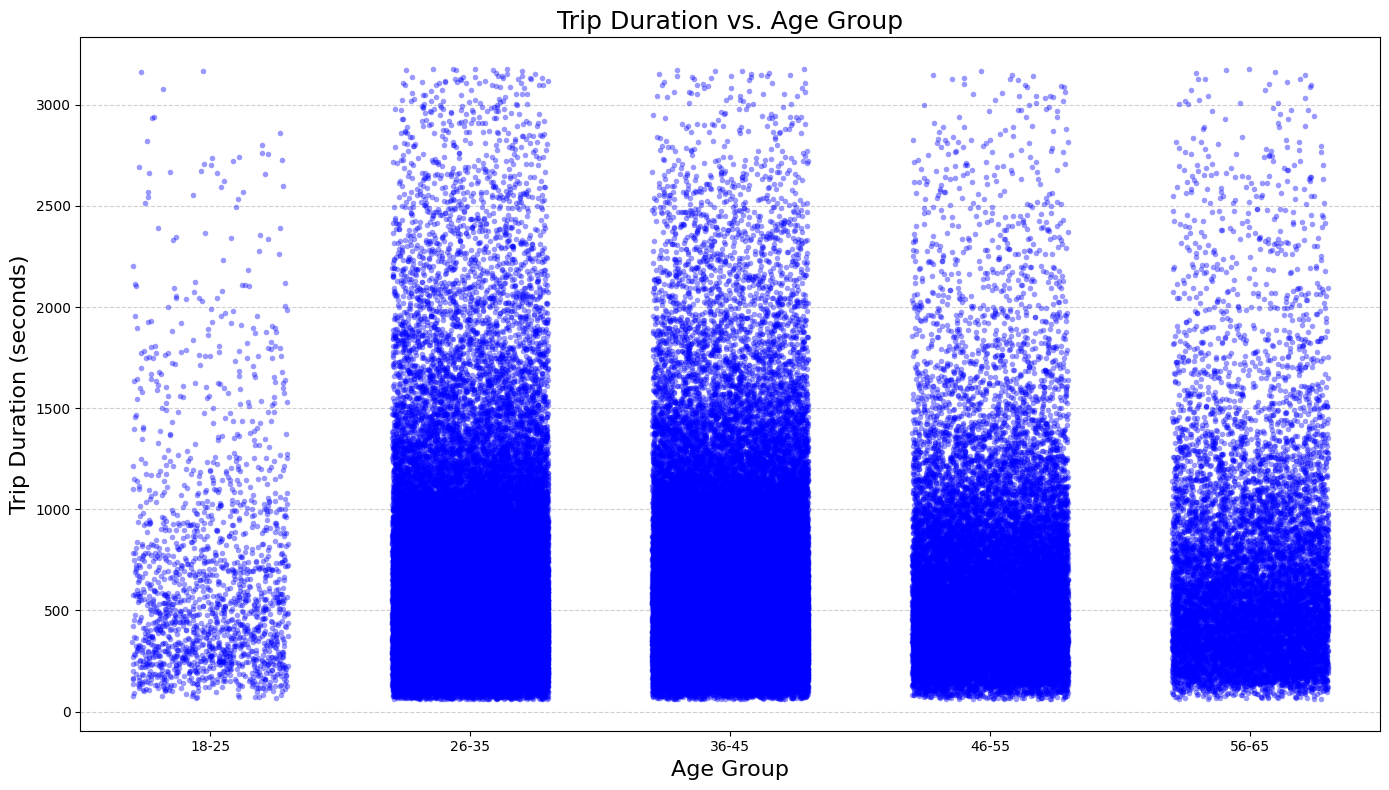

In [82]:
#Group age into bins
age_bins =[18, 25, 35, 45, 55, 65]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65']
df['age_group'] =pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

#List of columns to filter outliers
columns_to_filter = ['duration_sec', 'Age']

#loop througe each column and filter out outliers
filtered_data = df
for column in columns_to_filter:
    filtered_data = filter_outliers(filtered_data, column)

#Create a a Scatter plot to check the relationship between trip duration and user age
plt.figure(figsize=(14,8))
sns.stripplot(x='age_group', y='duration_sec', data=filtered_data, size=4, jitter=0.3,color='blue', alpha=0.4) #call the filter_outliers() function and reuse the filtered data

#Add label and titles
plt.title('Trip Duration vs. Age Group', fontsize=18)
plt.xlabel('Age Group', fontsize=16)
plt.ylabel('Trip Duration (seconds)', fontsize=16)
plt.tight_layout()

#Add gridlines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

From above we can see that the distribution of trip duration is different for each age group. This suggests that age is a factor that influences how long people spend on trips.
Also we can see that younger people tend to have shorter trip durations on average.
The bar for the older age groups are wider and more spread out than those for younger age groups.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

In this investigation, I observed several key relationships between trip duartion, user type and other variables.
The bivariat exploration revealed that Customers tend to take longer trips than subscribers.
This difference suggests that customer may use the service extended trips, while subscribers use it more frequently for commuting or shorter, regular rides.
When controlling for bike share program participation, subscribers trip durations remained stable, while customers showed no participation in the program, suggesting limited interest or access.
Additionally, geographic clustering of longer trips suggest certain areas attract more extended rides.
Seems that age has no significant impact on trip duration.
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Yes, the geographic concentration of longer trips in specific areas might reflect regional differences in how bike-sharing
service is used.
Areas with longer trips could indicate locations with more potential due to their outdoor activities, attracting users who spend more time riding. 
also the lack of customers participation in Bike Share Program is an intresting observation.
It suggest either a potential barrier to access or lack of engagement from casual users in the program.

## Multivariate Exploration


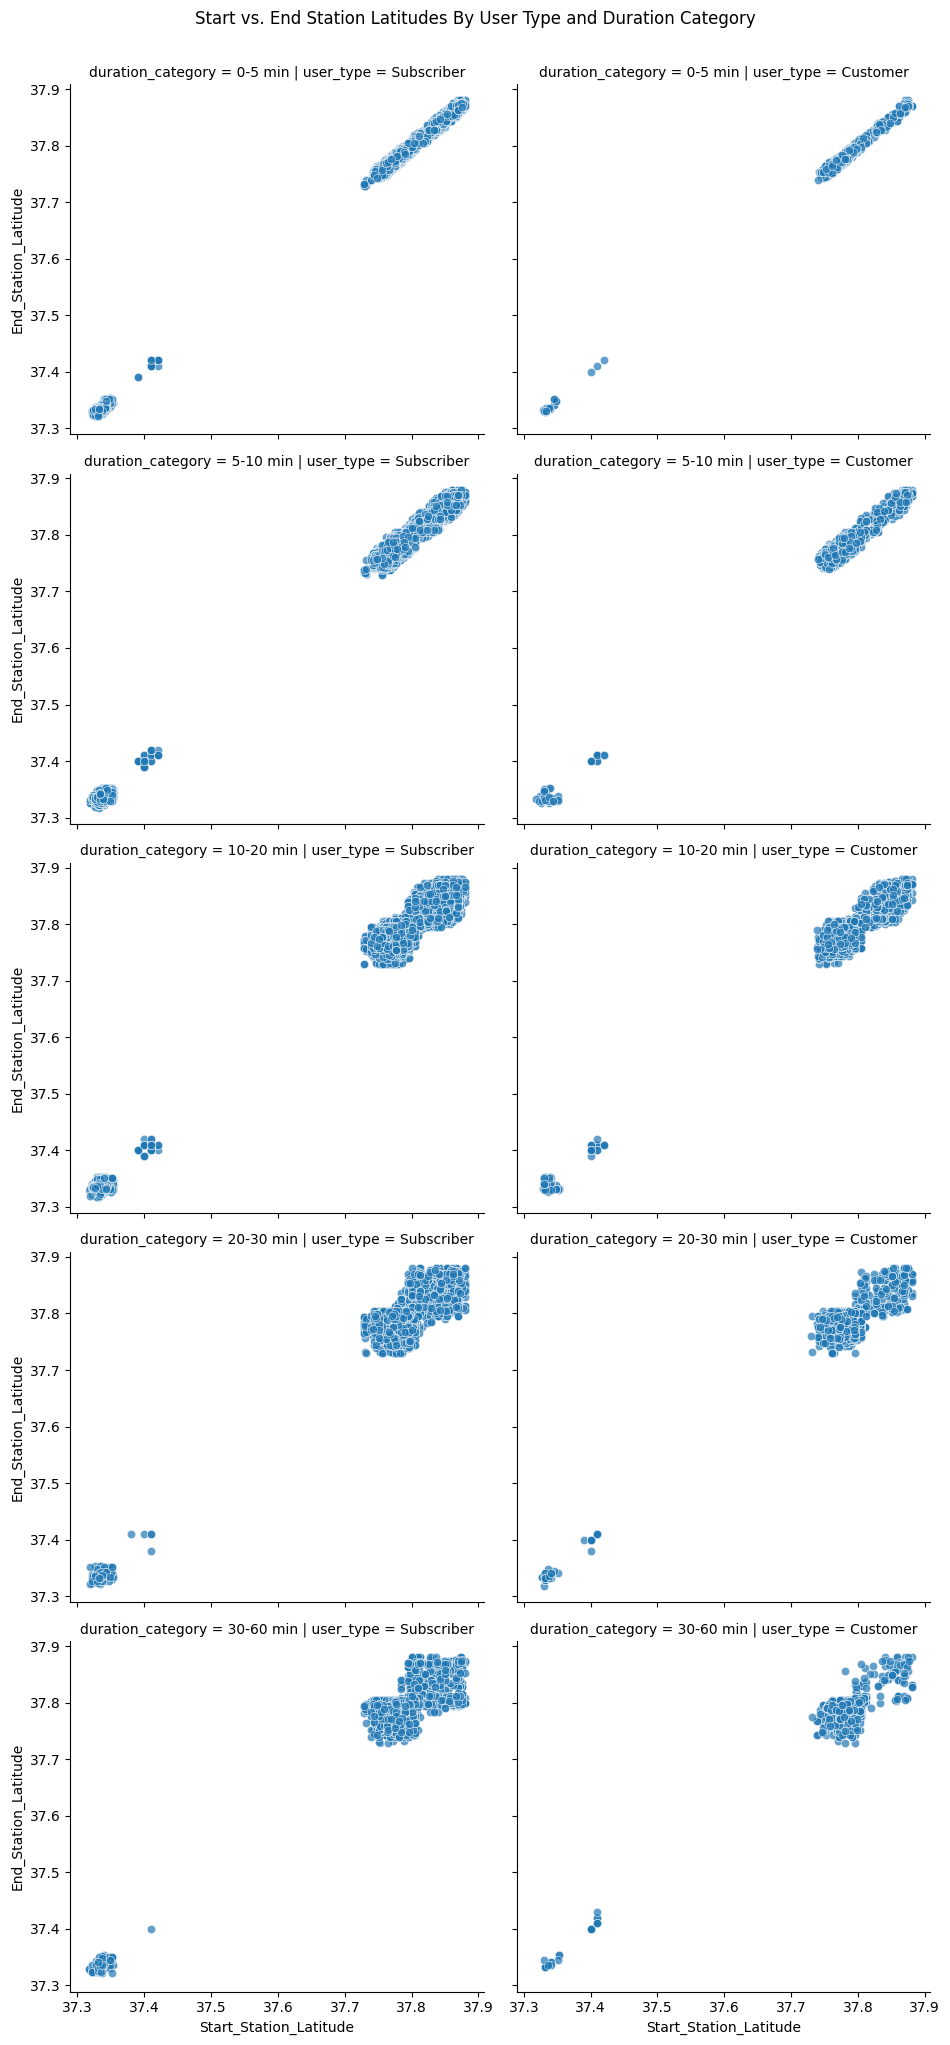

In [83]:
#I want to explore the relationship between the start and end station latitudes of bike trips, with additional information about user type and trip duration
#Cretae bins for 'duration_sec' to categorize durations
bins = [0, 300, 600, 1200, 1800, 3600] #Define the bins in seconds
labels = ['0-5 min', '5-10 min', '10-20 min', '20-30 min', '30-60 min']
filtered_data['duration_category'] = pd.cut(filtered_data['duration_sec'], bins=bins, labels=labels)

#Create a FaceGrid with separate plots for each user type and duration category
g = sns.FacetGrid(filtered_data, col="user_type", row='duration_category', height=4, aspect=1.2, palette='colorblind')
g.map(sns.scatterplot, 'start_station_latitude', 'end_station_latitude', alpha=0.7)
            
#Add titles and labels
g.set_axis_labels('Start_Station_Latitude', 'End_Station_Latitude')
g.fig.suptitle('Start vs. End Station Latitudes By User Type and Duration Category', y=1.02)


plt.show()

From above we can see that points are clustered in certain regions, indicating that many trips start and end within specific geographic areas.
The two user types, Subscribers and Customers, seems to have distinct patterns. subscriber trips are more concentrated in certain areas. Customers trips, on the other hand, appear more dispersed.regarding trip duration, we can see that longer trips tend to occur within specific geographic areas.
There appears to be a weak positive linear trend between Start_Station_Latitude and End_Station_Latitude.
Also, subscribers with longer trip duration have specific routes or areas they frequent.

Now I will Create a plot matrix to explore relationships between duration_sec  and cities(I will create new column using the start_station_longitude and end_station_latitude) with gender

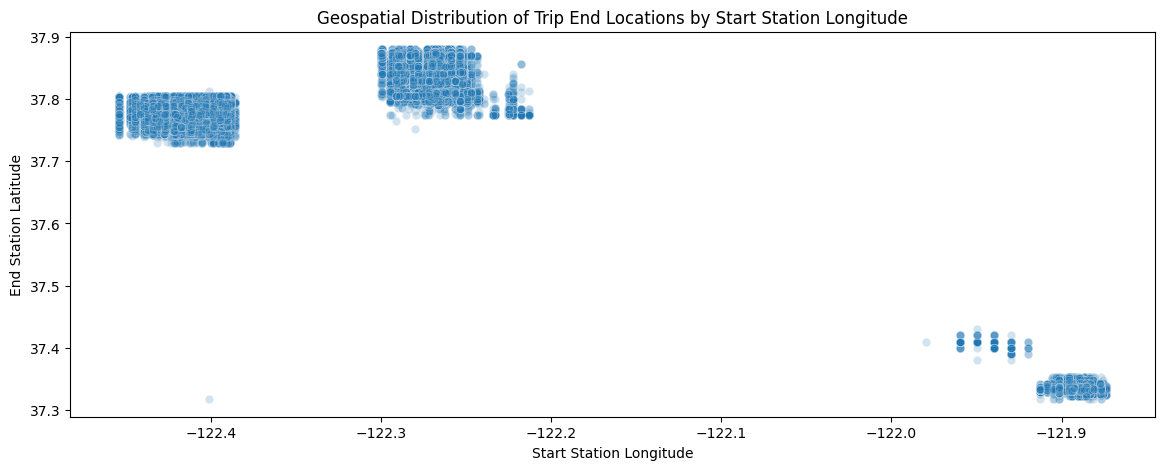

In [84]:
#I  checked  the clusters in google to see where the cluster are
# set plot dimensions
plt.figure(figsize=(14,5))

#Scatter Plot
sns.scatterplot (data =df, x = 'start_station_longitude', y ='end_station_latitude', alpha=0.2)

#Add labels and title
plt.xlabel('Start Station Longitude')
plt.ylabel('End Station Latitude')
plt.title('Geospatial Distribution of Trip End Locations by Start Station Longitude')
plt.show()

In [85]:
#Now I will Create new city variable using 2 conditions after checking in Google the name of the cities as mantion above
#np.where(condition' value if condition is true, value if condition is false)
df['cities'] = np.where( df['start_station_longitude'] <= -122.35, 'San Francisco', np.where(df['start_station_longitude'] <=-122.1, 'Oakland', 'San Jose'))
df['cities'].value_counts()

San Francisco    126764
Oakland           40227
San Jose           8156
Name: cities, dtype: int64

In [86]:
#lets check first the values in 'member_gender' column
df['member_gender'].unique()

array(['Male', 'Other', 'Female'], dtype=object)

In [91]:
#lets filter  the member_gender to keep only "Male" or "Female" and also to drop rows with NaN value

df = df[df['member_gender'].isin(['Male', 'Female'])].dropna(subset=['member_gender'])


In [92]:
df['member_gender'].value_counts()

Male      130651
Female     40844
Name: member_gender, dtype: int64

In [88]:
print(df.columns)

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip', 'Age',
       'age_group', 'cities'],
      dtype='object')


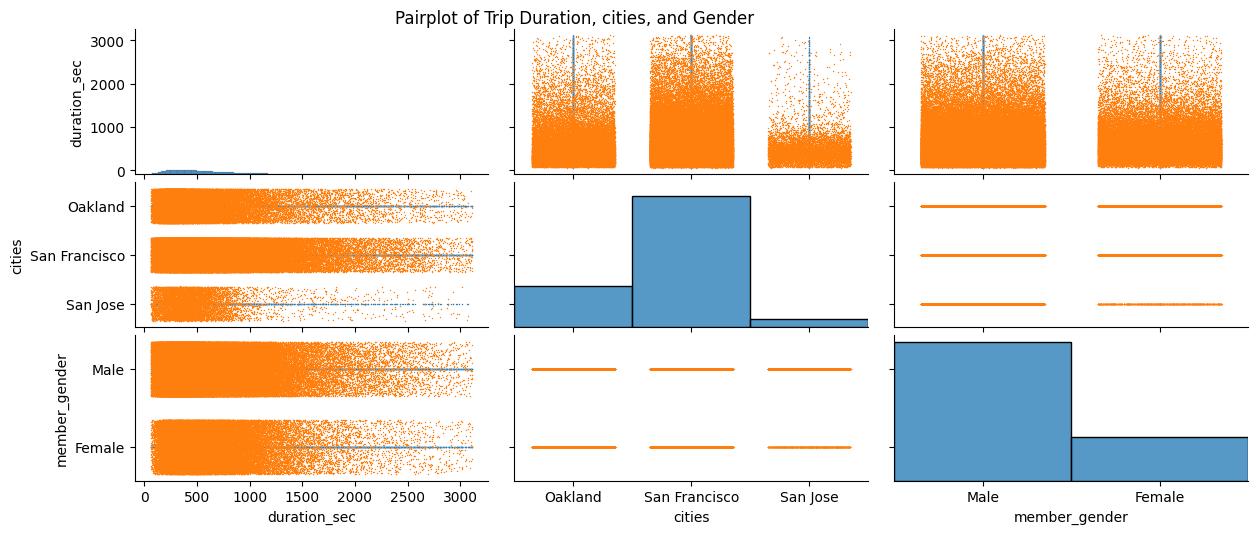

In [93]:
#Finally I will Creat the pairplot `to explore relationships between duration_sec and cities with gender
df_filtered = filter_outliers(df, 'duration_sec')

g=sns.pairplot(data=df_filtered,
             vars=['duration_sec', 'cities', 'member_gender'],
             plot_kws={'s': 1}) #adjusting transparency and point size

#Map the stripplot function to the off-diagonal axes
g.map_offdiag(sns.stripplot, size=1, jitter=0.35)

#Add title for the entire plot
plt.suptitle('Pairplot of Trip Duration, cities, and Gender', y=1.02)

#Set Plot Dimensions - FIGURE LEVEL
g.fig.set_size_inches(14, 5);



#Show the Plot
plt.show()

From above we can see most bike-sharing trips are relatively short in duration. 
The start_station_latitude seems to be concentrated within a sepsific geographical areas. The scatterplots between latitude and other variables(duration_sec, member_gender) don't reveal any obvious patterns or correlations.
There dose not seem to be a significant difference in trip durations or start latitude distributions between male and female members.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In this analysis, i extended my investigation of trip duration by user type by examining addtional factors, including geograpic location - start and end station latitudes with additional details about user type, Gender and Age.
The multivariate exploration reveald that subscribers tend to have trips concentrated within spesific areas.
while customer show a more dispersed pattern across the region.
While there is a weak positive linear trend between start and end station latitiudes, we can see longer trips tend to occur within certain geographic areas, possibly indicating popular or attractive locations for extended rides.
The distribution for duration_sec and latitude look similar for both genders.

### Were there any interesting or surprising interactions between features?

Yes. It was intresting to find out that longer trips tended to occur in spesific areas, even among subscribers, who usually take shorter, more consistent trips. This suggests that certain areas may attract longer rides, regardless of user type.

## Conclusions

Observations of the data exploration part:

1. **Trip Duration Distribution**: 
*Most trips are on the shorter side, with highest frequency in the 200-600 secnod range.
*As trip duration increases, the frequency of trips decreases
2. **User Type Distribution**:
*The majority of the users are 'Subscribers', with a significantly smaller number of 'Customers'.
3. **Trip Duration by User Type**:
*Customers tend to take longer trips on average, with a wider range of trip durations.
*Subscribers have shorter and more consistent trip durations, with fewer extreme long trips.
4. **Geographic**:
*Trips are concentrated in specific geographic areas, indicate users tend to use the bike-sharing system within familiar 
or frequently visited locations.
*The trip duration varies by location, with some areas having longer trips than others.
5. **Trip Duration by Age**:
*For most age groups, trip durations are mainly under 1000 seconds, with fewer longer trips.
*Users of all ages tend to complete trips within a similar duration range.
6. **Customer vs Subscriber participation**:
*Customers take significantly longer trips compared to Subscribers when not participating in the bike-share program.
*Subscribers maintain fairly consistent average trip duration, regardless of whether they are in the bike-share program or not.
*No data for Customers in the Bike share program.
7. **Geographic patterns by User Type**:
*Points are clustered in spesific areas for both subscribers and Customers, although customers trips are more dispersed.
*Subscribers show more concentration in specific areas, with longer trips occurring within these regions.
8. **Trip Duration and Geographic correlation by User Type**:
*There is a weak positive linear trend between Start_station_Latitude and End_station_Latitude.
*Subscribers with longer trip durations appear to frequent specific routes ar areas, suggesting a pattern in trip routes within certain regions.
9. **Trip Duration, Geographic location and Gender**:
*There is no significant difference in trip durations or latitude distributions between male and female members.